In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camacha
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | shahr-e babak
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | inuvik
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | damietta
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | la macarena
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | kushiro
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kloulklubed
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of

Processing Record 39 of Set 4 | deputatskiy
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | general nakar
Processing Record 42 of Set 4 | moiyabana
City not found. Skipping...
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | sire
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | asosa
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | haibowan
City not found. Skipping...
Processing Record 1 of Set 5 | mocambique
City not found. Skipping...
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | zhongshu
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | morondava
Processing Record 7 of Set 5 | burriana
Processing Record 8 of Set 5 | puerto escondido
Processing Record 9 of Set 5 | kavieng
Processing Reco

Processing Record 28 of Set 8 | yuancheng
Processing Record 29 of Set 8 | tadine
Processing Record 30 of Set 8 | bairiki
Processing Record 31 of Set 8 | praya
Processing Record 32 of Set 8 | kontagora
Processing Record 33 of Set 8 | ayagoz
Processing Record 34 of Set 8 | tsiroanomandidy
Processing Record 35 of Set 8 | presidencia roque saenz pena
Processing Record 36 of Set 8 | nelson bay
Processing Record 37 of Set 8 | exeter
Processing Record 38 of Set 8 | gwadar
Processing Record 39 of Set 8 | kupang
Processing Record 40 of Set 8 | fenton
Processing Record 41 of Set 8 | hede
Processing Record 42 of Set 8 | itoman
Processing Record 43 of Set 8 | koumac
Processing Record 44 of Set 8 | ocampo
Processing Record 45 of Set 8 | bondo
Processing Record 46 of Set 8 | inhambane
Processing Record 47 of Set 8 | waingapu
Processing Record 48 of Set 8 | verkhoyansk
Processing Record 49 of Set 8 | port hedland
Processing Record 50 of Set 8 | muros
Processing Record 1 of Set 9 | urumqi
Processing R

Processing Record 15 of Set 12 | mentok
City not found. Skipping...
Processing Record 16 of Set 12 | dolni lutyne
Processing Record 17 of Set 12 | saint-joseph
Processing Record 18 of Set 12 | faanui
Processing Record 19 of Set 12 | kudahuvadhoo
Processing Record 20 of Set 12 | auxerre
Processing Record 21 of Set 12 | nara
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | sabang
Processing Record 24 of Set 12 | zeya
Processing Record 25 of Set 12 | sandpoint
Processing Record 26 of Set 12 | bismil
Processing Record 27 of Set 12 | los llanos de aridane
Processing Record 28 of Set 12 | jalu
Processing Record 29 of Set 12 | garissa
Processing Record 30 of Set 12 | bukama
Processing Record 31 of Set 12 | chokwe
Processing Record 32 of Set 12 | bilma
Processing Record 33 of Set 12 | misratah
Processing Record 34 of Set 12 | clarence town
Processing Record 35 of Set 12 | san jose
Processing Record 36 of Set 12 | yarada
Processing Record 37 of Set 12 | olafsvik
Processin

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camacha,33.0833,-16.3333,62.53,77,20,3.44,PT,2021-12-22 01:38:38
1,Port Alfred,-33.5906,26.8910,68.20,92,14,3.94,ZA,2021-12-22 01:38:38
2,Shahr-E Babak,30.1165,55.1186,44.78,64,54,6.08,IR,2021-12-22 01:38:38
3,Hobart,-42.8794,147.3294,64.11,52,75,1.01,AU,2021-12-22 01:38:39
4,Torbay,47.6666,-52.7314,34.75,92,75,25.32,CA,2021-12-22 01:35:28
5,Rikitea,-23.1203,-134.9692,75.18,83,100,15.73,PF,2021-12-22 01:38:39
6,Inuvik,68.3499,-133.7218,2.16,82,90,6.91,CA,2021-12-22 01:38:39
7,Vao,-22.6667,167.4833,77.50,78,79,11.63,NC,2021-12-22 01:38:40
8,Damietta,31.4165,31.8133,53.78,80,31,14.61,EG,2021-12-22 01:38:40
9,Ushuaia,-54.8000,-68.3000,47.86,76,20,31.07,AR,2021-12-22 01:38:40


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camacha,PT,2021-12-22 01:38:38,33.0833,-16.3333,62.53,77,20,3.44
1,Port Alfred,ZA,2021-12-22 01:38:38,-33.5906,26.8910,68.20,92,14,3.94
2,Shahr-E Babak,IR,2021-12-22 01:38:38,30.1165,55.1186,44.78,64,54,6.08
3,Hobart,AU,2021-12-22 01:38:39,-42.8794,147.3294,64.11,52,75,1.01
4,Torbay,CA,2021-12-22 01:35:28,47.6666,-52.7314,34.75,92,75,25.32
5,Rikitea,PF,2021-12-22 01:38:39,-23.1203,-134.9692,75.18,83,100,15.73
6,Inuvik,CA,2021-12-22 01:38:39,68.3499,-133.7218,2.16,82,90,6.91
7,Vao,NC,2021-12-22 01:38:40,-22.6667,167.4833,77.50,78,79,11.63
8,Damietta,EG,2021-12-22 01:38:40,31.4165,31.8133,53.78,80,31,14.61
9,Ushuaia,AR,2021-12-22 01:38:40,-54.8000,-68.3000,47.86,76,20,31.07


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
#lats = city_data_df["Lat"]
#max_temps = city_data_df["Max Temp"]
#humidity = city_data_df["Humidity"]
#cloudiness = city_data_df["Cloudiness"]
#wind_speed = city_data_df["Wind Speed"]

In [11]:
#Extract the Relevant Fields from the Data Frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

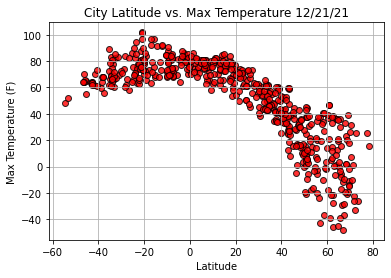

In [12]:
# Import the time Module
import time

# Build the scatter plot for latitude vs. max temperature.

#plt.scatter(lats,
#            max_temps,
 #           edgecolor="black", linewidths=1, marker="o",
 #           alpha=0.8, label="Cities")



plt.scatter(lats,max_temps,edgecolor="black", facecolor='red',linewidths=1, marker = "o", alpha = 0.8, label = "Cities")
   
# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))  
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save an image of the plot
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()


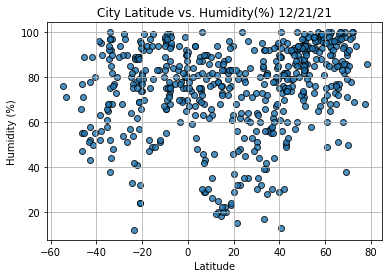

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity(%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

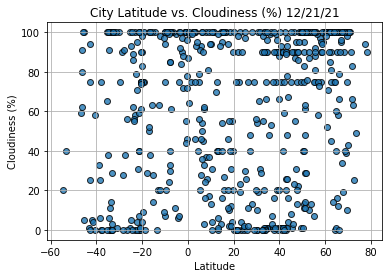

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

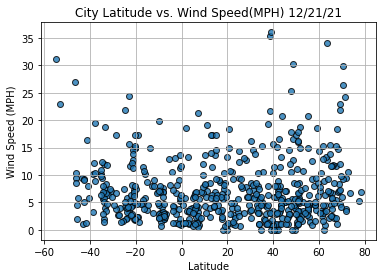

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed(MPH) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City                      Kushiro
Country                        JP
Date          2021-12-22 01:38:41
Lat                        42.975
Lng                      144.3747
Max Temp                    27.55
Humidity                       50
Cloudiness                     20
Wind Speed                   11.5
Name: 13, dtype: object

In [17]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
553     True
554     True
555    False
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camacha,PT,2021-12-22 01:38:38,33.0833,-16.3333,62.53,77,20,3.44
2,Shahr-E Babak,IR,2021-12-22 01:38:38,30.1165,55.1186,44.78,64,54,6.08
4,Torbay,CA,2021-12-22 01:35:28,47.6666,-52.7314,34.75,92,75,25.32
6,Inuvik,CA,2021-12-22 01:38:39,68.3499,-133.7218,2.16,82,90,6.91
8,Damietta,EG,2021-12-22 01:38:40,31.4165,31.8133,53.78,80,31,14.61


In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camacha,PT,2021-12-22 01:38:38,33.0833,-16.3333,62.53,77,20,3.44
2,Shahr-E Babak,IR,2021-12-22 01:38:38,30.1165,55.1186,44.78,64,54,6.08
4,Torbay,CA,2021-12-22 01:35:28,47.6666,-52.7314,34.75,92,75,25.32
6,Inuvik,CA,2021-12-22 01:38:39,68.3499,-133.7218,2.16,82,90,6.91
8,Damietta,EG,2021-12-22 01:38:40,31.4165,31.8133,53.78,80,31,14.61


In [21]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Port Alfred,ZA,2021-12-22 01:38:38,-33.5906,26.8910,68.20,92,14,3.94
3,Hobart,AU,2021-12-22 01:38:39,-42.8794,147.3294,64.11,52,75,1.01
5,Rikitea,PF,2021-12-22 01:38:39,-23.1203,-134.9692,75.18,83,100,15.73
7,Vao,NC,2021-12-22 01:38:40,-22.6667,167.4833,77.50,78,79,11.63
9,Ushuaia,AR,2021-12-22 01:38:40,-54.8000,-68.3000,47.86,76,20,31.07


In [22]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp (F)',(5,5))

NameError: name 'plot_linear_regression' is not defined

In [ ]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp (F)',(-55,95))

In [ ]:
# Linear regression on the Northern Hemisphere - % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 'Humidity (%)',(45,10))

In [ ]:
# Linear regression on the Southern Hemisphere - % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity', 'Humidity (%)',(-55,15))

In [ ]:
# Linear regression on the Northern Hemisphere - % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness ', 'Cloudiness (%)',(20,45))

In [ ]:
# Linear regression on the Southern Hemisphere - % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness (%)',(-45,20))

In [ ]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)',(0,27))

In [ ]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)',(-45,30))

In [ ]:
#--------------Linear Regression Function (Start)-------------------------------------------
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
#--------------Linear Regression Function (End)-------------------------------------------